<a href="https://colab.research.google.com/github/bruiz1974/Challenge-Telecom-/blob/main/AluraStoreLatam_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



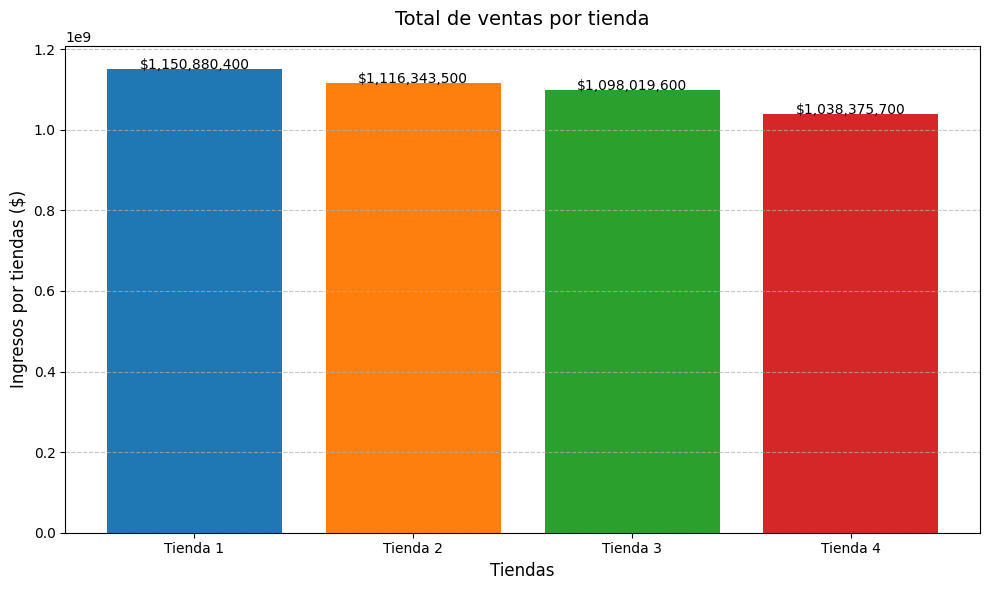

In [9]:


# Calcular el total de ventas para cada tienda
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [
    tienda['Precio'].sum().round(2),
    tienda2['Precio'].sum().round(2),
    tienda3['Precio'].sum().round(2),
    tienda4['Precio'].sum().round(2)
]

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(tiendas, ingresos, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Total de ventas por tienda', fontsize=14, pad=15)
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Ingresos por tiendas ($)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Agregar nivel del total de las ventas sobre las barras del gr+afico
for i, v in enumerate(ingresos):
    plt.text(i, v + 1000000, f'${v:,.0f}', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('revenue_by_store.png')
plt.show()
plt.close()


# 2. Ventas por categoría





<ipython-input-13-7df5317538be>:26: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-7df5317538be>:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("category_sales_by_store.png")


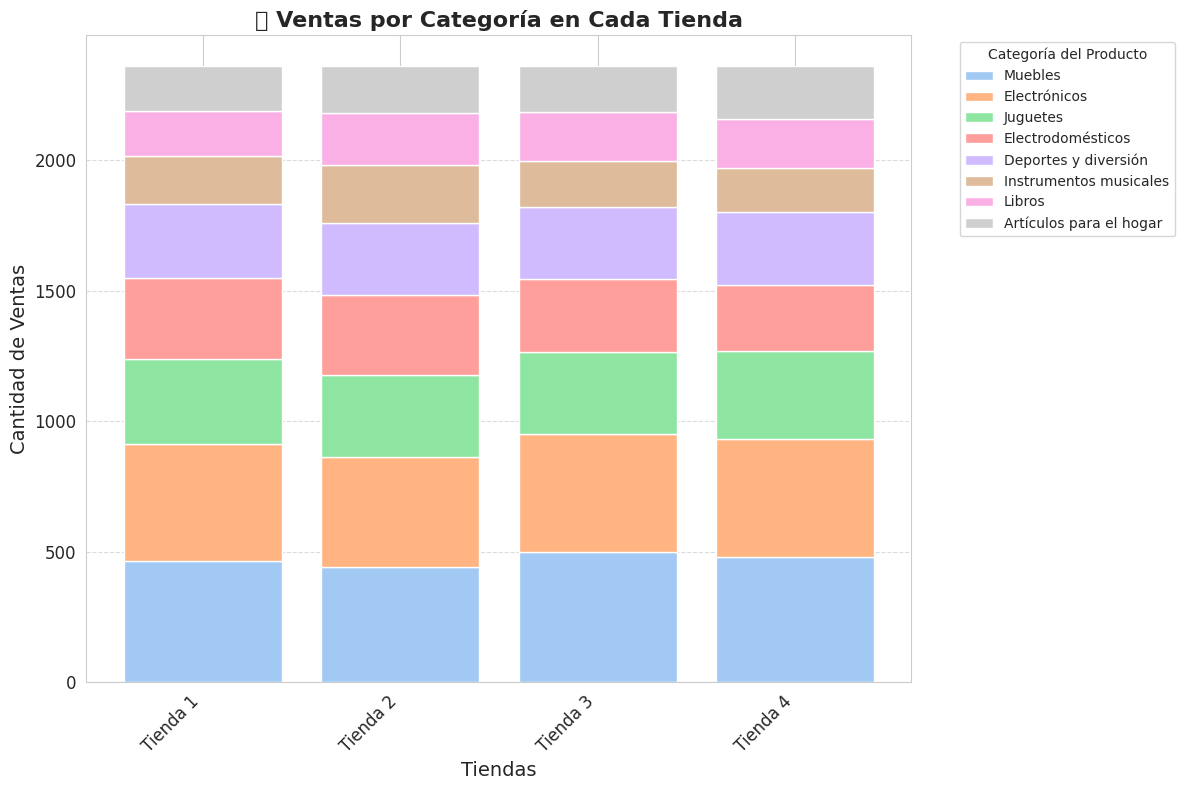

In [13]:
#import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del gráfico con una nueva paleta más clara
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")  # Fondo limpio y claro

bottom = [0] * len(stores)  # Inicializar la parte inferior para apilar
colors = sns.color_palette("pastel", len(categories))  # Paleta de colores suaves

for i, category in enumerate(categories):
    counts = [category_counts[store][category] for store in stores]
    plt.bar(stores, counts, bottom=bottom, label=category, color=colors[i])
    bottom = [bottom[j] + counts[j] for j in range(len(bottom))]

plt.title("📊 Ventas por Categoría en Cada Tienda", fontsize=16, fontweight="bold")
plt.xlabel("Tiendas", fontsize=14)
plt.ylabel("Cantidad de Ventas", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Agregar leyenda y cuadrícula
plt.legend(title="Categoría del Producto", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("category_sales_by_store.png")
plt.show()


# 3. Calificación promedio de la tienda


<ipython-input-16-9cabec388d02>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tiendas', y='Calificación', data=data, palette='viridis')


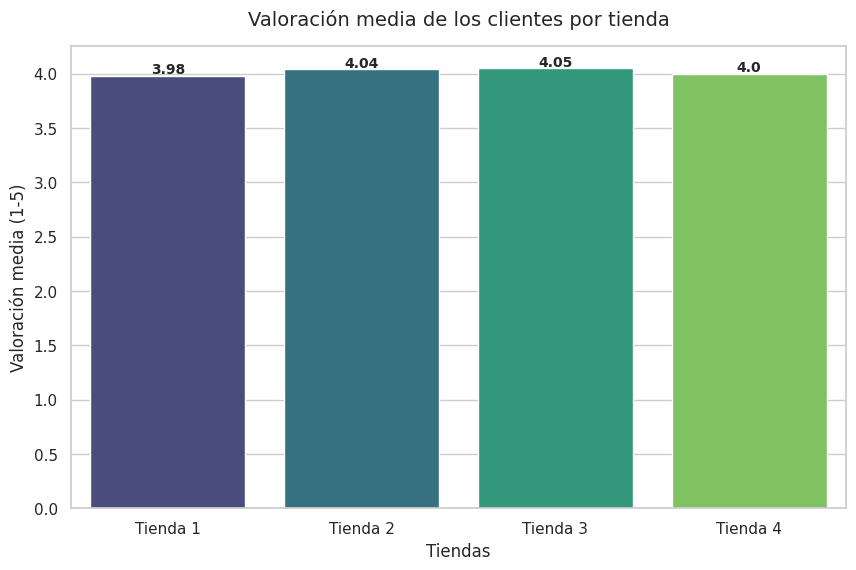

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer estilo
sns.set_theme(style="whitegrid")

# Crear DataFrame con los datos de calificación
data = pd.DataFrame({
    'Tiendas': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificación': [
        tienda['Calificación'].mean().round(2),
        tienda2['Calificación'].mean().round(2),
        tienda3['Calificación'].mean().round(2),
        tienda4['Calificación'].mean().round(2)
    ]
})

# Crear gráfico mejorado
plt.figure(figsize=(10, 6))
sns.barplot(x='Tiendas', y='Calificación', data=data, palette='viridis')

# Añadir etiquetas encima de las barras
for i, v in enumerate(data['Calificación']):
    plt.text(i, v + 0.02, f'{v}', ha='center', fontsize=10, fontweight='bold')

# Mejorar títulos y etiquetas
plt.title('Valoración media de los clientes por tienda', fontsize=14, pad=15)
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Valoración media (1-5)', fontsize=12)

# Guardar imagen en alta calidad
plt.savefig('average_rating_by_store_improved.png', dpi=300)

# Mostrar gráfico
plt.show()

# 4. Productos más y menos vendidos

<ipython-input-22-9548b098fe94>:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-9548b098fe94>:30: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("product_sales_by_store_improved.png")


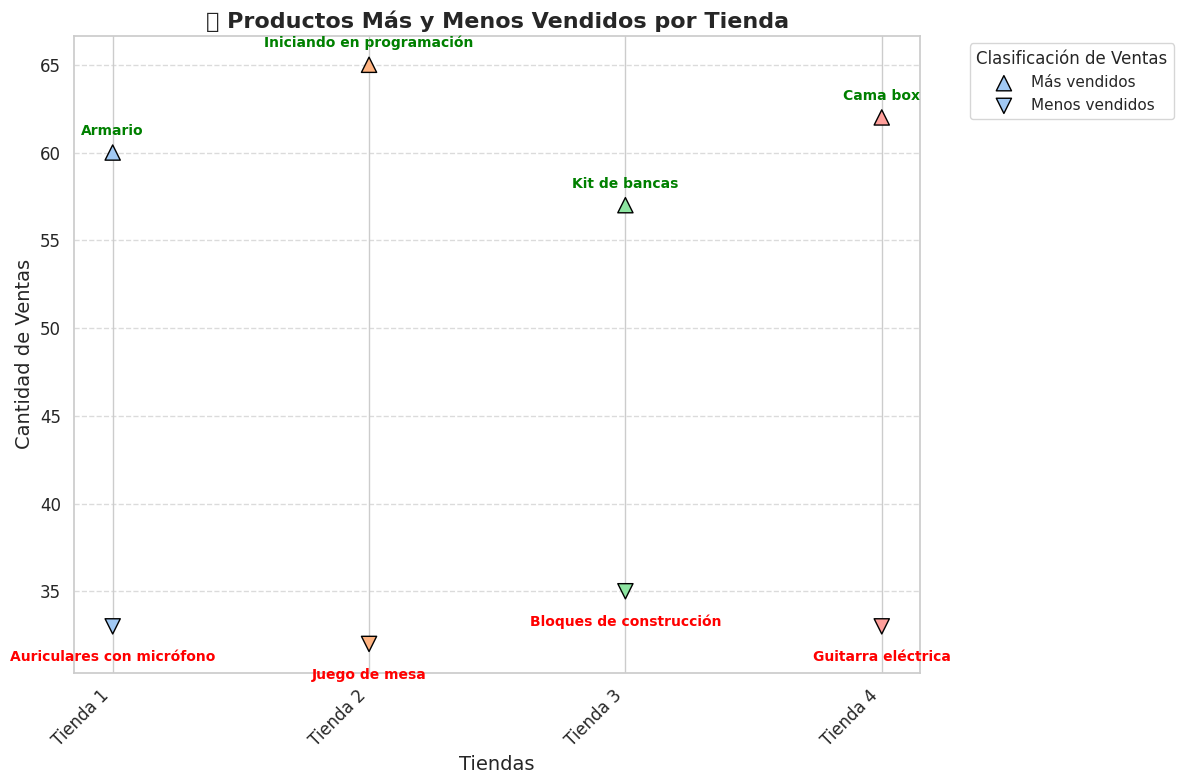

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del gráfico con una nueva paleta más clara
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")  # Fondo limpio y claro

# Datos de ejemplo
colors = sns.color_palette("pastel", len(stores))

# Crear gráfico de dispersión mejorado
plt.scatter(stores, most_sold, color=colors, marker='^', s=120, label="Más vendidos", edgecolor="black")
plt.scatter(stores, least_sold, color=colors, marker='v', s=120, label="Menos vendidos", edgecolor="black")

# Agregar nombres de productos como anotaciones
for i, (most_prod, least_prod, most_count, least_count) in enumerate(zip(most_sold_products, least_sold_products, most_sold, least_sold)):
    plt.text(i, most_count + 1, most_prod, ha="center", fontsize=10, color="green", fontweight="bold")
    plt.text(i, least_count - 2, least_prod, ha="center", fontsize=10, color="red", fontweight="bold")

# Mejorar título y etiquetas
plt.title("📊 Productos Más y Menos Vendidos por Tienda", fontsize=16, fontweight="bold")
plt.xlabel("Tiendas", fontsize=14)
plt.ylabel("Cantidad de Ventas", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Clasificación de Ventas", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.savefig("product_sales_by_store_improved.png")
plt.show()


# 5. Envío promedio por tienda

<ipython-input-25-55e174614d41>:28: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-25-55e174614d41>:29: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.savefig("shipping_cost_by_store.png")


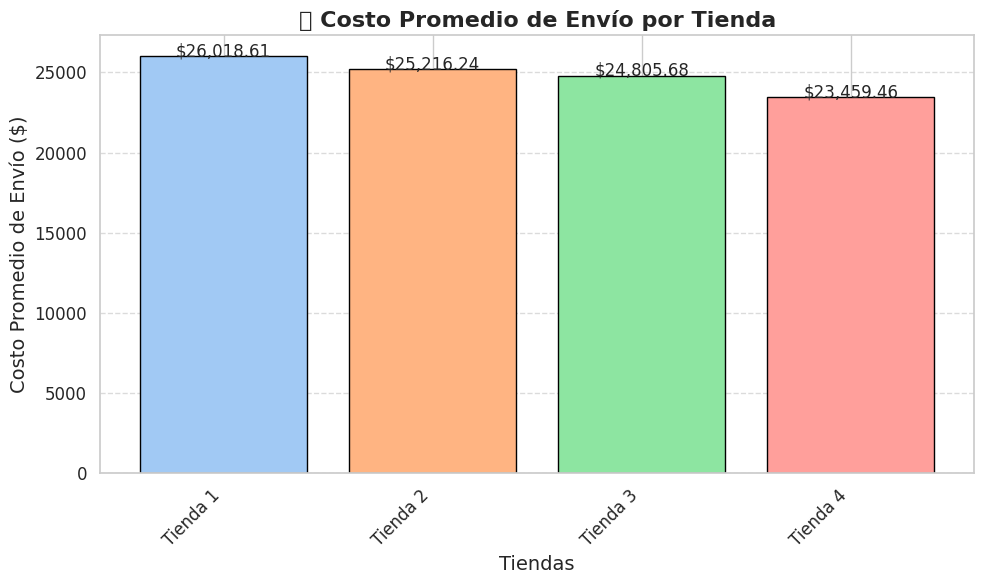

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir datos de costo de envío por tienda
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
dataframes = [tienda, tienda2, tienda3, tienda4]  # Lista de DataFrames
costos_envio = [df["Costo de envío"].mean().round(2) for df in dataframes]  # Cálculo del costo promedio

# Crear gráfico de barras mejorado
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
colors = sns.color_palette("pastel", len(tiendas))
bars = plt.bar(tiendas, costos_envio, color=colors, edgecolor="black")

# Agregar etiquetas de valor sobre las barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height() + 0.5, f"${bar.get_height():,.2f}", ha="center", fontsize=12)

# Mejorar título y etiquetas
plt.title("📦 Costo Promedio de Envío por Tienda", fontsize=16, fontweight="bold")
plt.xlabel("Tiendas", fontsize=14)
plt.ylabel("Costo Promedio de Envío ($)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.savefig("shipping_cost_by_store.png")
plt.show()


Resumen

Hemos analizado las cinco métricas clave de sus tiendas: ingresos, gastos, ventas por tipo de producto, qué tan contentos están los clientes y el rendimiento de los productos. Claramente, la Tienda 4 es la que menos dinero genera y la que menos valor estratégico tiene de todas sus tiendas. Aunque sus costos de envío son más bajos, esto no compensa su bajo rendimiento general.

Conclusión

La Tienda 4 tiene los ingresos más bajos ($1,038,375,700), muy por debajo de la Tienda 1, que es la que más vende. Aunque sus gastos de envío son los menores, esta pequeña ventaja no la hace rentable. Sus ventas por categoría son aceptables, pero no brilla en satisfacción del cliente ni en el volumen de ventas de productos.

Las otras tiendas, en cambio, tienen puntos fuertes claros:

Tienda 1 🏅: Es la que más ingresos genera, clave para la estabilidad de su negocio.
Tienda 2 🔎: Es fuerte en productos educativos, con gran potencial de crecimiento en ese nicho.
Tienda 3 ⭐: Tiene las mejores calificaciones de clientes y un buen desempeño en ventas en general.

Recomendación Final
Nuestra recomendación es vender la Tienda 4 y usar ese dinero para invertir más en las otras tres tiendas. Con esto, usted podrá:

Ganar más dinero: Al enfocarse en las tiendas más rentables.
Tener clientes más satisfechos: Priorizando las tiendas mejor valoradas.
Aprovechar sus puntos fuertes: Como el liderazgo en ingresos de la Tienda 1 y la especialización de la Tienda 2.

Esta decisión hará que su negocio sea más fuerte y rentable a futuro.